In [29]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

In [2]:
# Data with Throughput & WorkTime
df = pd.read_csv('./data/kokil dec 6 reprepare/conf_pc_worker_sem.csv')
df = df.dropna()

In [3]:
df = df.dropna()
df.head()

,Input.sentence_id,HITId,Input.convo_id,Input.train_test_val,Input.msg_id,Input.timestamp,Input.full_text,Input.speaker,Input.reply_to,Input.speaker_intention,...,prt,punct,purpcl,quantmod,rcmod,rel,root,tmod,xcomp,xsubj
5,11,3MG8450X2OASXZ0WO9O5AH70GU3UPA,Game1-italy-germany,Train,Game1-italy-germany-3,87,It seems like there are a lot of ways that cou...,germany-Game1,Game1-italy-germany-2,Truth,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,12,38G0E1M85M552JXSALX4G9WI2I6UVX,Game1-italy-germany,Train,Game1-italy-germany-7,117,"Sorry Italy I've been away doing, um, German t...",germany-Game1,Game1-italy-germany-6,Truth,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,14,3HYV4299H0WQ2B4TCS7PKDQ75WHE81,Game1-italy-germany,Train,Game1-italy-germany-8,119,"I don't think I'm ready to go for that idea, h...",germany-Game1,Game1-italy-germany-7,Truth,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,15,3XU9MCX6VOC4P079IHIO9TCNYLGR2P,Game1-italy-germany,Train,Game1-italy-germany-9,121,I am pretty conflicted about whether to guess ...,italy-Game1,Game1-italy-germany-8,Truth,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,16,3FVBZG9CLJEK4WQS7P2GC1H2EEQH0Q,Game1-italy-germany,Train,Game1-italy-germany-9,121,I am going to take it literally and say even ...,italy-Game1,Game1-italy-germany-8,Truth,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0


In [7]:
x_indices = range(df.shape[0])

In [19]:
df_y_axis = df["Throughput.1"].to_list()

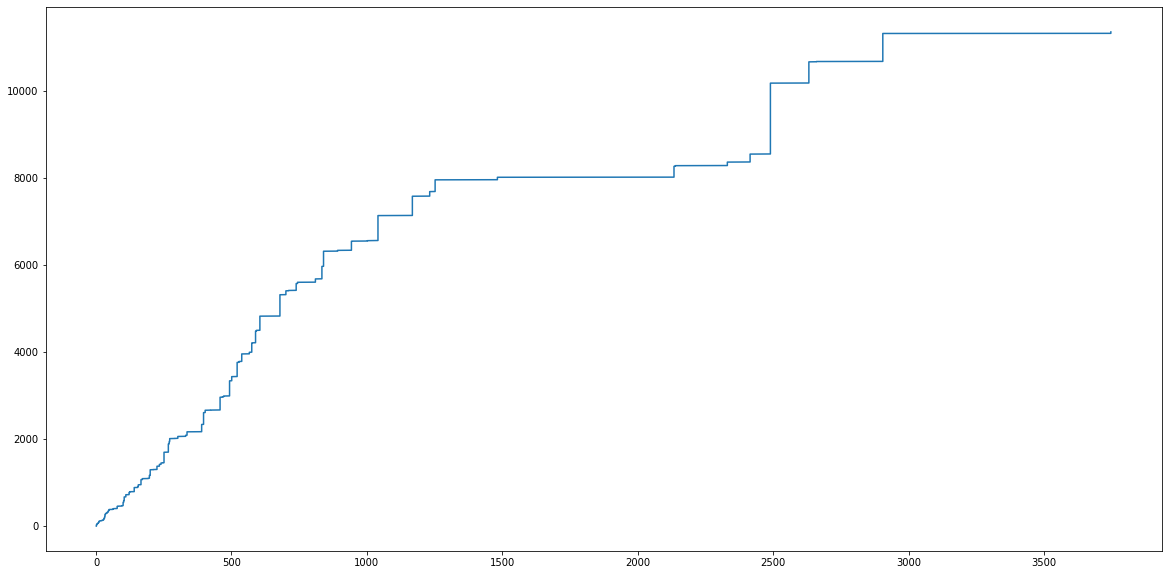

In [27]:
plt.figure(figsize=(20,10))

plt.plot(sorted(df_y_axis), x_indices)

### Testing Allen FBetaMeasure

In [19]:
import torch
import numpy as np

In [33]:
from allennlp.training.metrics import F1Measure
from allennlp.training.metrics import FBetaMeasure

f1_measure = F1Measure(positive_label=0)
#f1_measure = FBetaMeasure(average='macro')
predictions = torch.Tensor([[0.35, 0.25, 0.1, 0.1, 0.2],
                            [0.1, 0.6, 0.1, 0.2, 0.0],
                            [0.1, 0.6, 0.1, 0.2, 0.0],
                            [0.1, 0.5, 0.1, 0.2, 0.0],
                            [0.1, 0.2, 0.1, 0.7, 0.0],
                            [0.1, 0.6, 0.1, 0.2, 0.0]])
targets = torch.Tensor([0, 4, 1, 0, 3, 0])
predictions = torch.Tensor([[0,1,0,0,1,1]])
f1_measure(predictions, targets)
f1_measure.get_metric()

IndexError: The shape of the mask [6] at index 0 does not match the shape of the indexed tensor [1] at index 0

In [24]:
f1_measure.get_metric()

{'precision': 1.0, 'recall': 0.3333333432674408, 'f1': 0.5}

### Exploratory Data Analysis

<ipython-input-31-356a6a08f94f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

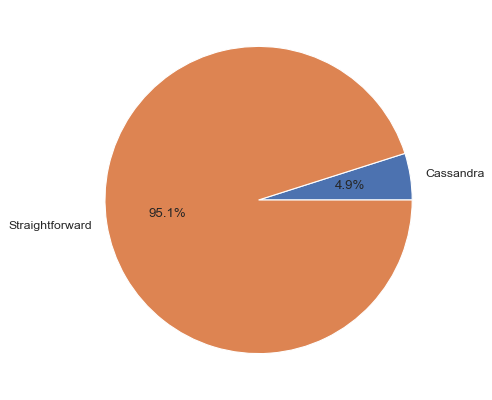

In [31]:
deception_groups = df.groupby(['Input.deception_quadrant']).size()
deception_groups = deception_groups / deception_groups.sum()
deception_groups.plot.pie(autopct='%1.1f%%')
plt.axes().set_ylabel('')

In [48]:
sub_df1 = df.groupby(['Answer.1gamemove.yes_label']).size()
sub_df1 = sub_df1 / sub_df1.sum()

sub_df2 = df.groupby(['Answer.2reasoning.yes_label']).size()
sub_df2 = sub_df2 / sub_df2.sum()

sub_df3 = df.groupby(['Answer.3rapport.yes_label']).size()
sub_df3 = sub_df3 / sub_df3.sum()

sub_df4 = df.groupby(['Answer.4shareinformation.yes_label']).size()
sub_df4 = sub_df4 / sub_df4.sum()

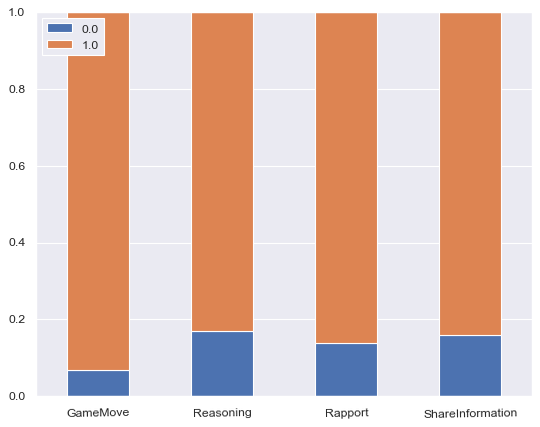

In [49]:
sub_df = pd.concat([sub_df1,sub_df2,sub_df3,sub_df4], keys=['GameMove', 'Reasoning', 'Rapport', 'ShareInformation']).unstack()
sub_df.plot(kind='bar', stacked=True, rot=1)
plt.legend(loc=2)  
plt.show()